In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
cd/content/drive/My Drive/Python Collabs/Bivariate Analysis With R and Python Checkpoint

/content/drive/My Drive/Python Collabs/Bivariate Analysis With R and Python Checkpoint


Importing Libraries

In [59]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Loading data

In [60]:
df=pd.read_csv("HR_comma_sep.csv",sep=",")

In [61]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No missing Values

In [62]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The type of data in each column match 





**Summarizing data**

In [64]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


the time_spend_company coulum shows an outlier which has been treated in the previous checkpoint since max=10 is so far from the mean and the median values

In [65]:
c="average_montly_hours"
j=df.describe()
j.loc[:,c]

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

Everything seems ok for the average_montly_hours 

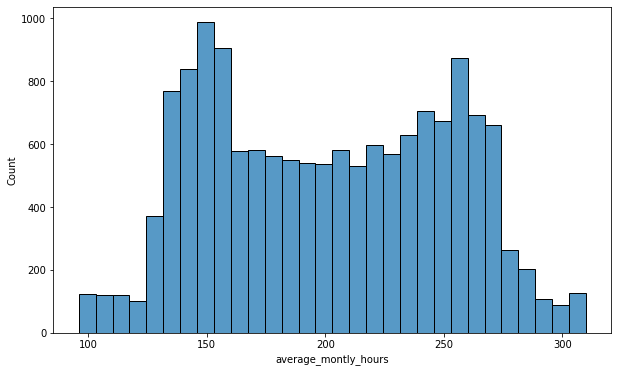

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(df[c])

The distrubition is not normal it shows that the majority works between 140 and 260 hours,  for a certain indivuduals they 
have tendancy to work much more or much less than other at 260 and 140 average hours

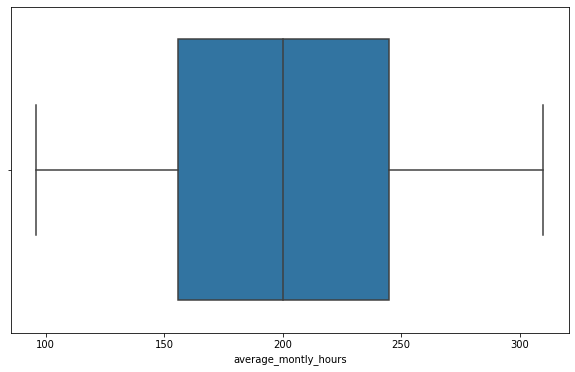

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df[c])

The boxplot shows no outliers

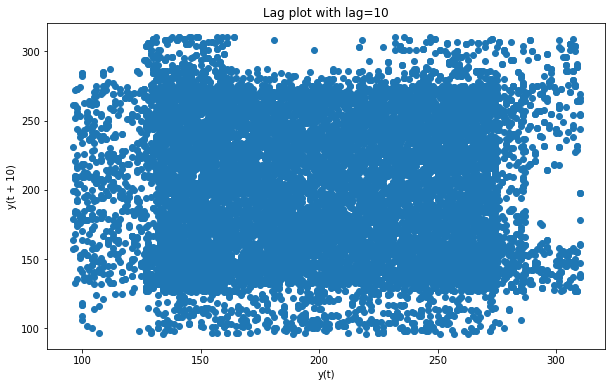

In [68]:
plt.figure(figsize=(10,6))
pd.plotting.lag_plot(df[c], lag=10)
plt.title("Lag plot with lag=10")
plt.show()

The lag plot shows a figure wich is concentrated in the middle as a rectangular shape, it confirms the density shown in the histogram and the tendancy of the majority of individuals to work between 140 and 260 hours. "Exceptions" has been mad by a sky of points outside the area.

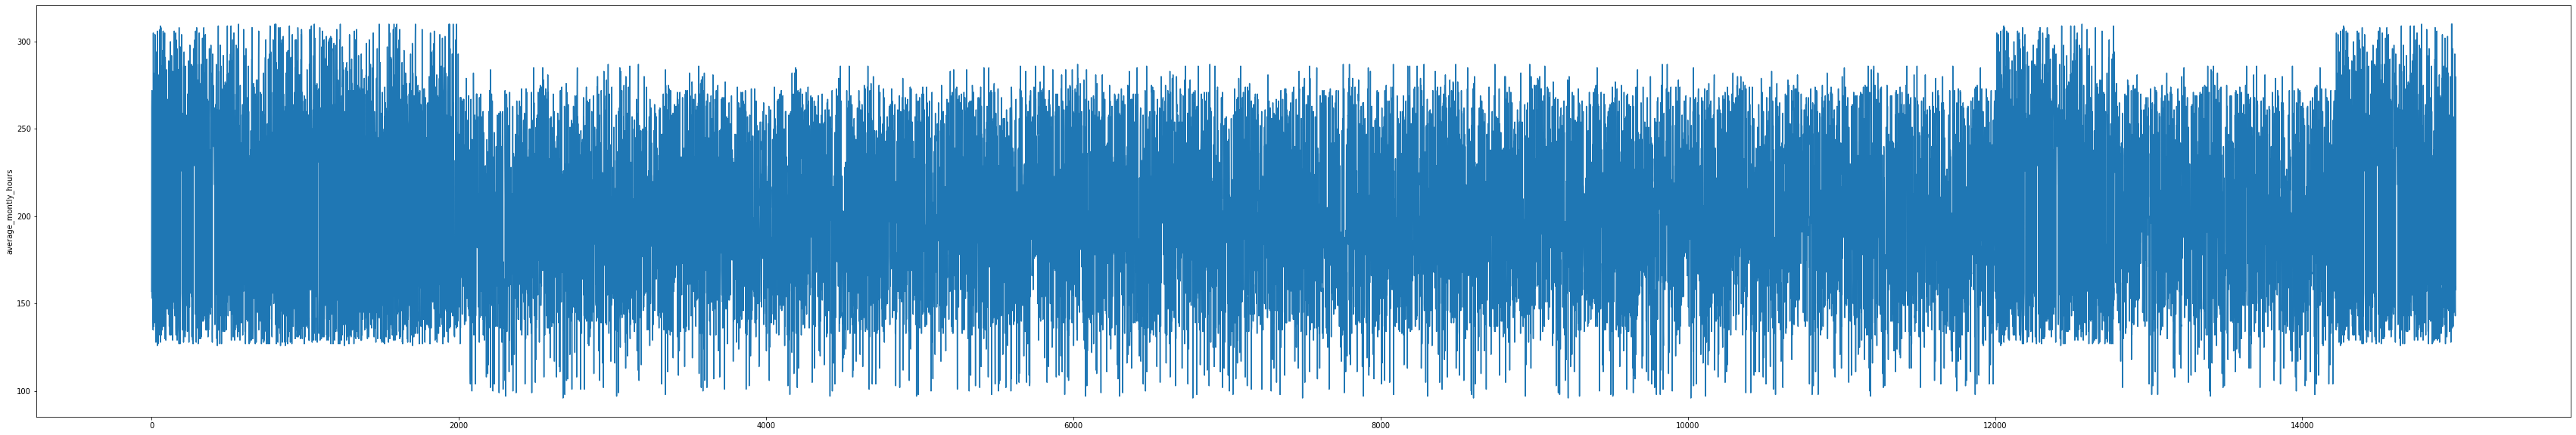

In [69]:
plt.figure(figsize=(60,10))
sns.lineplot(data = df[c])

no fixed location + no fixed variation

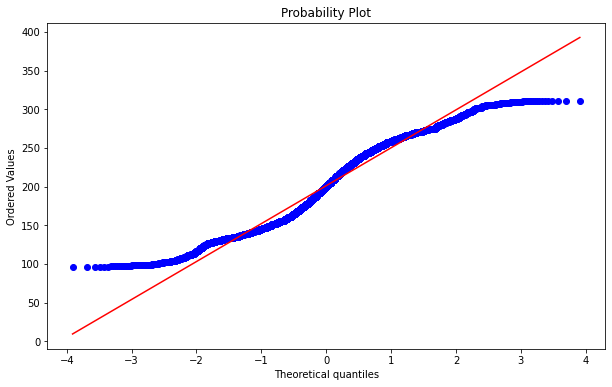

In [70]:
plt.figure(figsize=(10,6))
import scipy.stats as stats
stats.probplot(df[c],plot=plt)
plt.show()

The normal distribution test plot confirms the conclusion above / with outliers at the edges

In [71]:
df2=df.copy()
ot=df2.describe()
c='average_montly_hours'
max=(ot.loc['75%',c])+(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
min=(ot.loc['25%',c])-(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
print(max,min)

def outlier_funct(df2,c,max,min):
  for i in range(0,len(df2[c])):
    if df2[c][i]<min or df2[c][i]>max:
       df2[c][i]=np.nan

378.5 22.5


this part of code and this function:
1-Calculate the max and the min in the outlier formula
2-Detect the outliers values and replace them by np.nan # since the feature "average_montly_hours" data has no outliers we will use it now just to test 

In [72]:
outlier_funct(df2,c,max,min)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The verification gives no outliers values replaced by the dedicated function

In [73]:
df2[c].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [74]:
df3=df2.copy()
for i in range(0,len(df3[c])):
     if not df3[c][i]<10000000:
      df3[c][i]=df[c].median()

this function is for replacing nan values with median or mean 

In [75]:
b='number_project'

Defining b as the second parameter to treat 'number project'

In [76]:
j=df.describe()
j.loc[:,b]

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

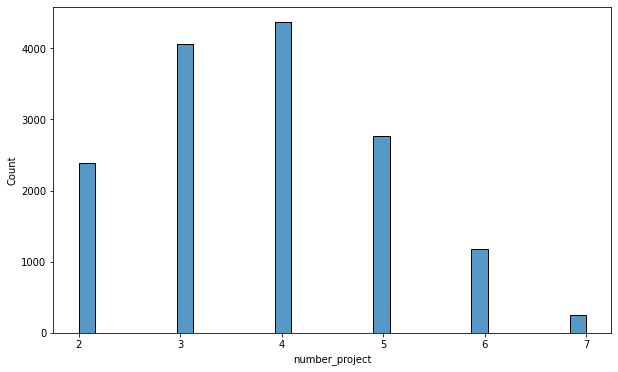

In [77]:
plt.figure(figsize=(10,6))
sns.histplot(df[b])

the distribution is not normal it has a slight deviation to the side of the minimum and the 1st quartile values

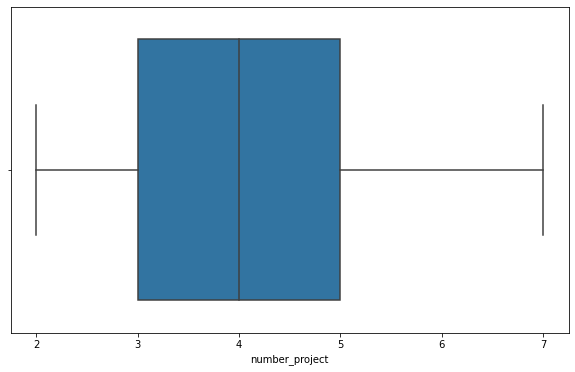

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df[b])

No outliers

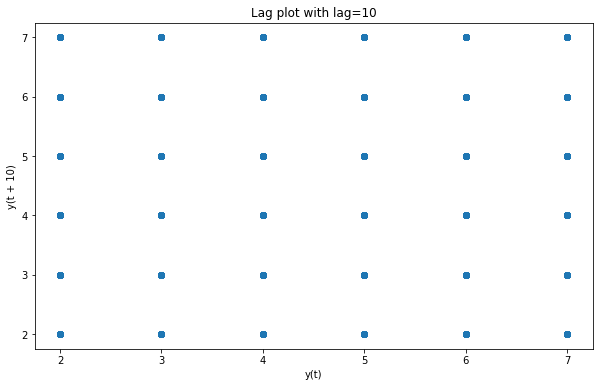

In [79]:
plt.figure(figsize=(10,6))
pd.plotting.lag_plot(df[b], lag=10)
plt.title("Lag plot with lag=10")
plt.show()

the lagplot is regular and shows a specific pattern

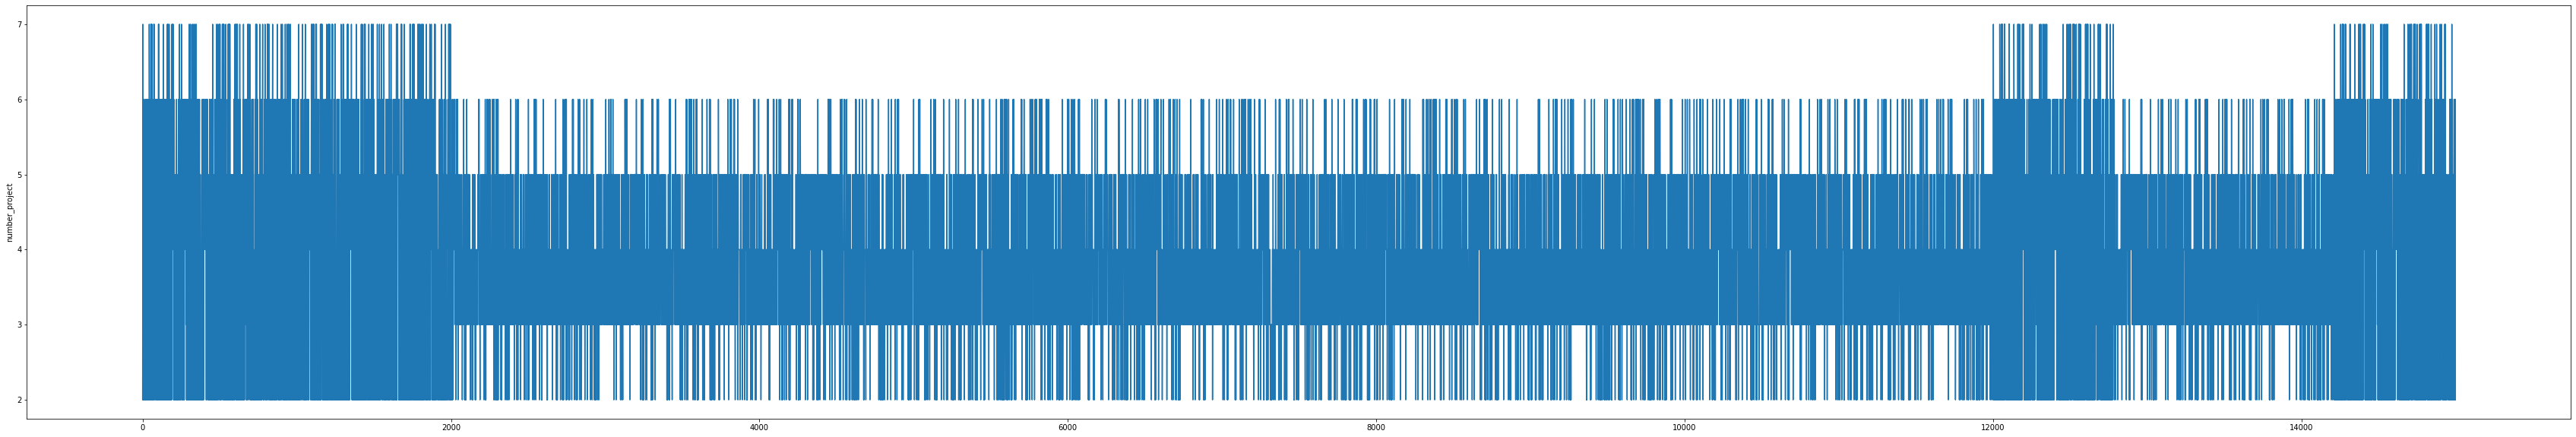

In [80]:
plt.figure(figsize=(60,10))
sns.lineplot(data = df[b])

no fixed location neither fixed variation

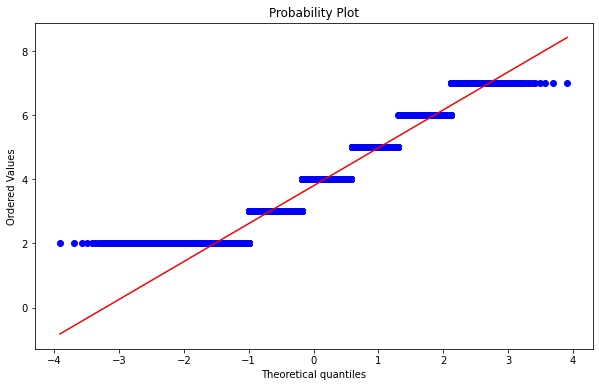

In [81]:
plt.figure(figsize=(10,6))
import scipy.stats as stats
stats.probplot(df[b],plot=plt)
plt.show()

the plot shows much more density in the sides wich confirms that values are superior to the median at the left of graph and inferior at the right

In [82]:
R=np.corrcoef(df[b],df[c])
print(R)

[[1.         0.41721063]
 [0.41721063 1.        ]]


R correlation coeficient

In [83]:
x=np.array(df[b]).reshape(-1,1)
print(x)

[[2]
 [5]
 [7]
 ...
 [2]
 [6]
 [2]]


In [84]:
X=np.array(df[b]).reshape(-1,1)
Y=np.array(df[c]).reshape(-1,1)

In [85]:
model = LinearRegression().fit(X,Y)
r_sq = model.score(X,Y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coef:', model.coef_)

coefficient of determination: 0.17406471345793328
intercept: [136.76027694]
coef: [[16.90485267]]


The expression of the regression is : 
average_montly_hours = 16.90485267 *number_project+ 136.76027694